# Data Exploration Analysis

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
%matplotlib inline

## Data Cleaning

In [3]:
plane_df = pd.read_csv('2018.csv')
plane_df.head()

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,...,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27
0,2018-01-01,UA,2429,EWR,DEN,1517,1512.0,-5.0,15.0,1527.0,...,268.0,250.0,225.0,1605.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-01-01,UA,2427,LAS,SFO,1115,1107.0,-8.0,11.0,1118.0,...,99.0,83.0,65.0,414.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-01-01,UA,2426,SNA,DEN,1335,1330.0,-5.0,15.0,1345.0,...,134.0,126.0,106.0,846.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-01-01,UA,2425,RSW,ORD,1546,1552.0,6.0,19.0,1611.0,...,190.0,182.0,157.0,1120.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-01-01,UA,2424,ORD,ALB,630,650.0,20.0,13.0,703.0,...,112.0,106.0,83.0,723.0,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
sum_missing_values = plane_df.isna().sum()
print(sum_missing_values)

FL_DATE                      0
OP_CARRIER                   0
OP_CARRIER_FL_NUM            0
ORIGIN                       0
DEST                         0
CRS_DEP_TIME                 0
DEP_TIME                112317
DEP_DELAY               117234
TAXI_OUT                115830
WHEELS_OFF              115829
WHEELS_ON               119246
TAXI_IN                 119246
CRS_ARR_TIME                 0
ARR_TIME                119245
ARR_DELAY               137040
CANCELLED                    0
CANCELLATION_CODE      7096862
DIVERTED                     0
CRS_ELAPSED_TIME            10
ACTUAL_ELAPSED_TIME     134442
AIR_TIME                134442
DISTANCE                     0
CARRIER_DELAY          5860736
WEATHER_DELAY          5860736
NAS_DELAY              5860736
SECURITY_DELAY         5860736
LATE_AIRCRAFT_DELAY    5860736
Unnamed: 27            7213446
dtype: int64


In [5]:
plane_df = plane_df.drop(columns=['Unnamed: 27'])

In [6]:
plane_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7213446 entries, 0 to 7213445
Data columns (total 27 columns):
 #   Column               Dtype  
---  ------               -----  
 0   FL_DATE              object 
 1   OP_CARRIER           object 
 2   OP_CARRIER_FL_NUM    int64  
 3   ORIGIN               object 
 4   DEST                 object 
 5   CRS_DEP_TIME         int64  
 6   DEP_TIME             float64
 7   DEP_DELAY            float64
 8   TAXI_OUT             float64
 9   WHEELS_OFF           float64
 10  WHEELS_ON            float64
 11  TAXI_IN              float64
 12  CRS_ARR_TIME         int64  
 13  ARR_TIME             float64
 14  ARR_DELAY            float64
 15  CANCELLED            float64
 16  CANCELLATION_CODE    object 
 17  DIVERTED             float64
 18  CRS_ELAPSED_TIME     float64
 19  ACTUAL_ELAPSED_TIME  float64
 20  AIR_TIME             float64
 21  DISTANCE             float64
 22  CARRIER_DELAY        float64
 23  WEATHER_DELAY        float64
 24

In [7]:
plane_df['CANCELLATION_CODE'].fillna('E', inplace=True) #E means plane isn't cancelled
plane_df['CANCELLATION_CODE'].unique()

array(['E', 'B', 'A', 'C', 'D'], dtype=object)

In [8]:
missing_duration_cols = ['DEP_DELAY', 'TAXI_OUT', 'TAXI_IN', 'ARR_DELAY', 'CRS_ELAPSED_TIME', 'ACTUAL_ELAPSED_TIME', 
                         'AIR_TIME', 'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY']
for col in missing_duration_cols:
    plane_df[col].fillna(0, inplace=True)

In [9]:
check_duration_na_fix = plane_df.isna().sum()
print(check_duration_na_fix)

FL_DATE                     0
OP_CARRIER                  0
OP_CARRIER_FL_NUM           0
ORIGIN                      0
DEST                        0
CRS_DEP_TIME                0
DEP_TIME               112317
DEP_DELAY                   0
TAXI_OUT                    0
WHEELS_OFF             115829
WHEELS_ON              119246
TAXI_IN                     0
CRS_ARR_TIME                0
ARR_TIME               119245
ARR_DELAY                   0
CANCELLED                   0
CANCELLATION_CODE           0
DIVERTED                    0
CRS_ELAPSED_TIME            0
ACTUAL_ELAPSED_TIME         0
AIR_TIME                    0
DISTANCE                    0
CARRIER_DELAY               0
WEATHER_DELAY               0
NAS_DELAY                   0
SECURITY_DELAY              0
LATE_AIRCRAFT_DELAY         0
dtype: int64


In [10]:
time_columns = ['DEP_TIME', 'WHEELS_OFF', 'WHEELS_ON', 'CRS_DEP_TIME', 'CRS_ARR_TIME', 'ARR_TIME']

for col in time_columns:
    plane_df[col].fillna(0, inplace=True)

In [11]:
check_duration_na_fix = plane_df.isna().sum()
print(check_duration_na_fix)

FL_DATE                0
OP_CARRIER             0
OP_CARRIER_FL_NUM      0
ORIGIN                 0
DEST                   0
CRS_DEP_TIME           0
DEP_TIME               0
DEP_DELAY              0
TAXI_OUT               0
WHEELS_OFF             0
WHEELS_ON              0
TAXI_IN                0
CRS_ARR_TIME           0
ARR_TIME               0
ARR_DELAY              0
CANCELLED              0
CANCELLATION_CODE      0
DIVERTED               0
CRS_ELAPSED_TIME       0
ACTUAL_ELAPSED_TIME    0
AIR_TIME               0
DISTANCE               0
CARRIER_DELAY          0
WEATHER_DELAY          0
NAS_DELAY              0
SECURITY_DELAY         0
LATE_AIRCRAFT_DELAY    0
dtype: int64


In [12]:
plane_df['FL_DATE']=pd.to_datetime(plane_df['FL_DATE'])
plane_df['FL_DATE']

0         2018-01-01
1         2018-01-01
2         2018-01-01
3         2018-01-01
4         2018-01-01
             ...    
7213441   2018-12-31
7213442   2018-12-31
7213443   2018-12-31
7213444   2018-12-31
7213445   2018-12-31
Name: FL_DATE, Length: 7213446, dtype: datetime64[ns]

## Data Summary

In [13]:
plane_df.info() # 7,213,446 rows and 27 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7213446 entries, 0 to 7213445
Data columns (total 27 columns):
 #   Column               Dtype         
---  ------               -----         
 0   FL_DATE              datetime64[ns]
 1   OP_CARRIER           object        
 2   OP_CARRIER_FL_NUM    int64         
 3   ORIGIN               object        
 4   DEST                 object        
 5   CRS_DEP_TIME         int64         
 6   DEP_TIME             float64       
 7   DEP_DELAY            float64       
 8   TAXI_OUT             float64       
 9   WHEELS_OFF           float64       
 10  WHEELS_ON            float64       
 11  TAXI_IN              float64       
 12  CRS_ARR_TIME         int64         
 13  ARR_TIME             float64       
 14  ARR_DELAY            float64       
 15  CANCELLED            float64       
 16  CANCELLATION_CODE    object        
 17  DIVERTED             float64       
 18  CRS_ELAPSED_TIME     float64       
 19  ACTUAL_ELAPSED_TIME  

## Flights Over Time

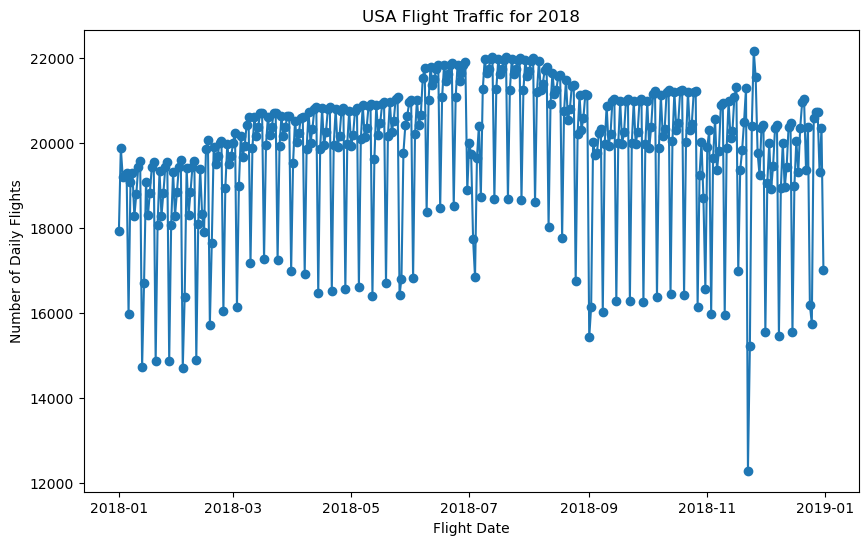

In [33]:
import matplotlib.pyplot as plt

#convert flight dates to date-time format
plane_df['FL_DATE'] = pd.to_datetime(plane_df['FL_DATE'])
flights_by_date = plane_df.groupby('FL_DATE').size()

#line graph for flights over time
plt.figure(figsize=(10, 6))
plt.plot(flights_by_date.index, flights_by_date.values, marker='o', linestyle='-')
plt.xlabel('Flight Date')
plt.ylabel('Number of Daily Flights')
plt.title('USA Flight Traffic for 2018')
plt.show()

The graph above displays the number of flights across the United States in 2018 by date. This graphs depicts seasonality and times when there was highest/lowest flight trafic. Flight traffic was particularly high during the summer months and low for the first two months of the year.

## Top 10 Busiest Airports

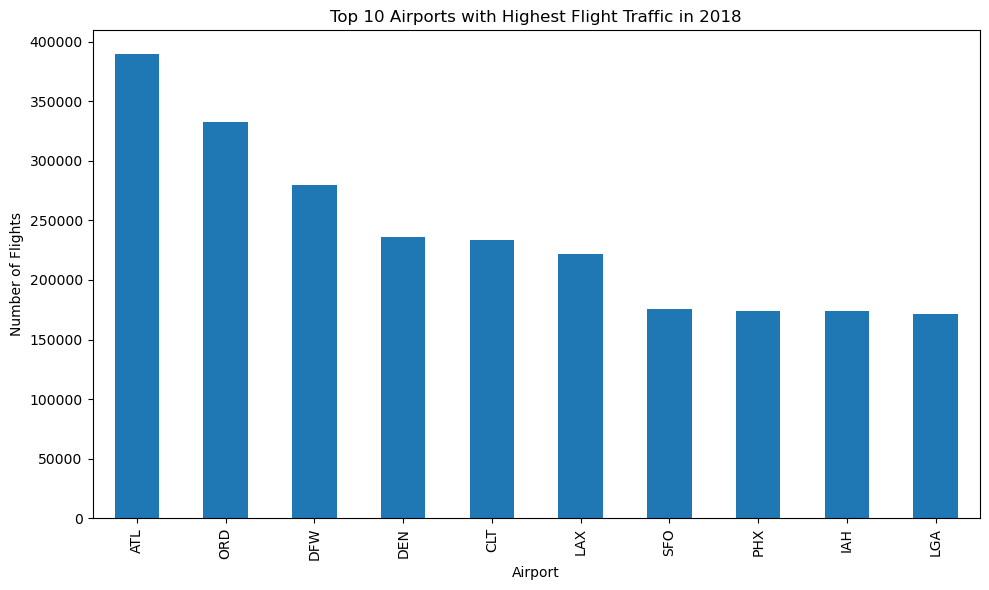

In [38]:
#get busiest airports list and limit list to top 10
flights_by_origin = plane_df.groupby('ORIGIN').size().sort_values(ascending=False)
top_10_airports = flights_by_origin.head(10)

#plot bar graph of top 10 busiest airports based on number of flights
plt.figure(figsize=(10, 6))
top_10_airports.plot(kind='bar')
plt.xlabel('Airport')
plt.ylabel('Number of Flights')
plt.title('Top 10 Airports with Highest Flight Traffic in 2018')
plt.tight_layout()
plt.show()

Using the graph above, passengers can understand which airports face the largest number of flights. This may lead to increased number of scheduling delays, longer boarding times, and higher risk of flight cancellation. Logistically, planning flight schedules at these airports are also significantly more challenging than doing it for smaller traffic airports.

## Flight Cancellation Analysis

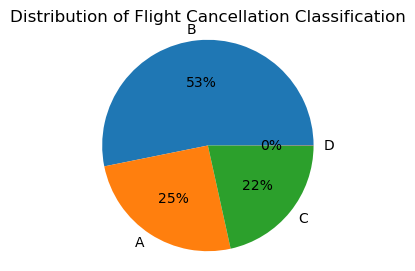

In [39]:
#determine which flights are cancelled
cancelled_flights = plane_df[plane_df['CANCELLED'] == 1]

#group cancellations by cancellation code
reasons_for_cancellation = cancelled_flights['CANCELLATION_CODE'].value_counts()

#plot pie chart
plt.figure(figsize=(3, 3))
plt.pie(reasons_for_cancellation, labels=reasons_for_cancellation.index, autopct='%1.f%%')
plt.title('Distribution of Flight Cancellation Classification')
plt.axis('equal')
plt.show()

The pie chart above categorizes the flight cancellation reasons as follows:

* A - airline/carrier cancellation
* B - weather cancellation
* C - airport security cancellation
* D - national airport security cancellation

Based on the graph, the top reason for flight cancellation is due to weather. The impact of this delay on airports significantly depends on the geographic airport location and the climate of that area. Some flights may be cancelled due to winter storms while others are cancelled due to heat waves.

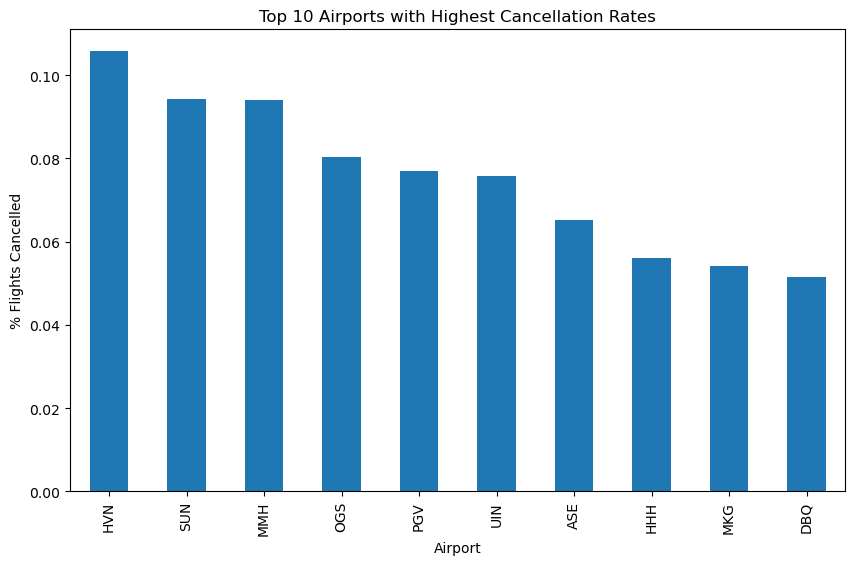

In [40]:
#determine which flights are cancelled
cancelled_flights = plane_df[plane_df['CANCELLED'] == 1]

#calculate the proportion of cancelled flights for each airport
cancellation_rates = cancelled_flights['ORIGIN'].value_counts() / plane_df['ORIGIN'].value_counts()

#get the top airports for most cancellations
sorted_airports = cancellation_rates.sort_values(ascending=False)

# bar graph to show airports with highest cancellation rates
plt.figure(figsize=(10, 6))
top_airports = sorted_airports.head(10) #limit to top 10 airports only
top_airports.plot(kind='bar')
plt.xlabel('Airport')
plt.ylabel('% Flights Cancelled')
plt.title('Top 10 Airports with Highest Cancellation Rates')
plt.show()

The x-axis in the bar graph above shows the airport codes for the top 10 airports with the highest cancellation rates. The airports are:

* HVN - Tweed New Haven Airport (New Haven, Connecticut, USA)
* SUN - Friedman Memorial Airport (Hailey, Idaho, USA)
* MMH - Mammoth Yosemite Airport (Mammoth Lakes, California, USA)
* OGS - Ogdensburg International Airport (Ogdensburg, New York, USA)
* PGV - Pitt-Greenville Airport (Greenville, North Carolina, USA)
* UIN - Quincy Regional Airport (Baldwin Field) (Quincy, Illinois, USA)
* ASE - Aspen/Pitkin County Airport (Sardy Field) (Aspen, Colorado, USA)
* HHH - Hilton Head Island Airport (Hilton Head Island, South Carolina, USA)
* MKG - Muskegon County Airport (Muskegon, Michigan, USA)
* DBQ - Dubuque Regional Airport (Dubuque, Iowa, USA)

All these airports are fairly small airports so the reason they have such high cancellation rates may be due to the fact that the flights planned in/out of this airport are for a small number of passengers (<100), so the risk of cancelling is higher as it has less economic impact than cancelling high demand flights in popular areas. 

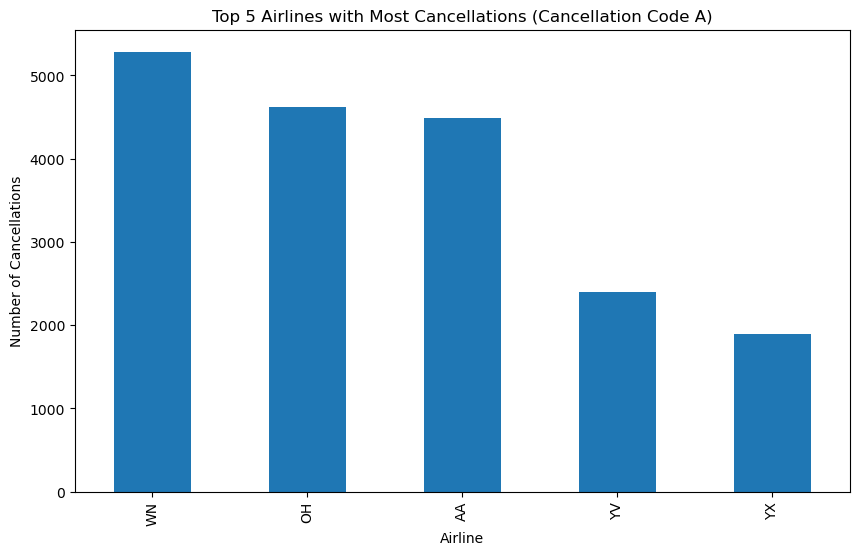

In [41]:
# Filter for cancelled flights with CANCELLATION_CODE 'A'
canceled_flights = plane_df[(plane_df['CANCELLED'] == 1) & (plane_df['CANCELLATION_CODE'] == 'A')]

# Count the number of cancellations for each airline
airline_cancellations = canceled_flights['OP_CARRIER'].value_counts()

# Get the top 5 airlines with the most cancellations
top_airlines = airline_cancellations.head(5)

# Plot the bar graph to show the top 5 airlines with most cancellations
plt.figure(figsize=(10, 6))
top_airlines.plot(kind='bar')
plt.xlabel('Airline')
plt.ylabel('Number of Cancellations')
plt.title('Top 5 Airlines with Most Cancellations (Cancellation Code A)')
plt.show()

The bar plot above shows the following airline names with their codes:

* WN - Southwest Airlines
* OH - PSA Airlines (American Eagle)
* AA - American Airlines
* YV: Mesa Airlines
* YX: Republic Airways

The results of this data analysis uncover which airline companies have the highest cancellation risk. This helps people booking their flight for a specific route avoid certain airlines with higher risk of cancellation. These airlines have the highest risk of cancelling their flights due to internal reasons (not reasons such as weather), hence the filter of Cancellation_Code = 'A', which means the flight was cancelled by the airline. Customers should avoid flying with these airlines when possible to prevent the risk of losing their plane ticket fee.

## Flight Delay Analysis

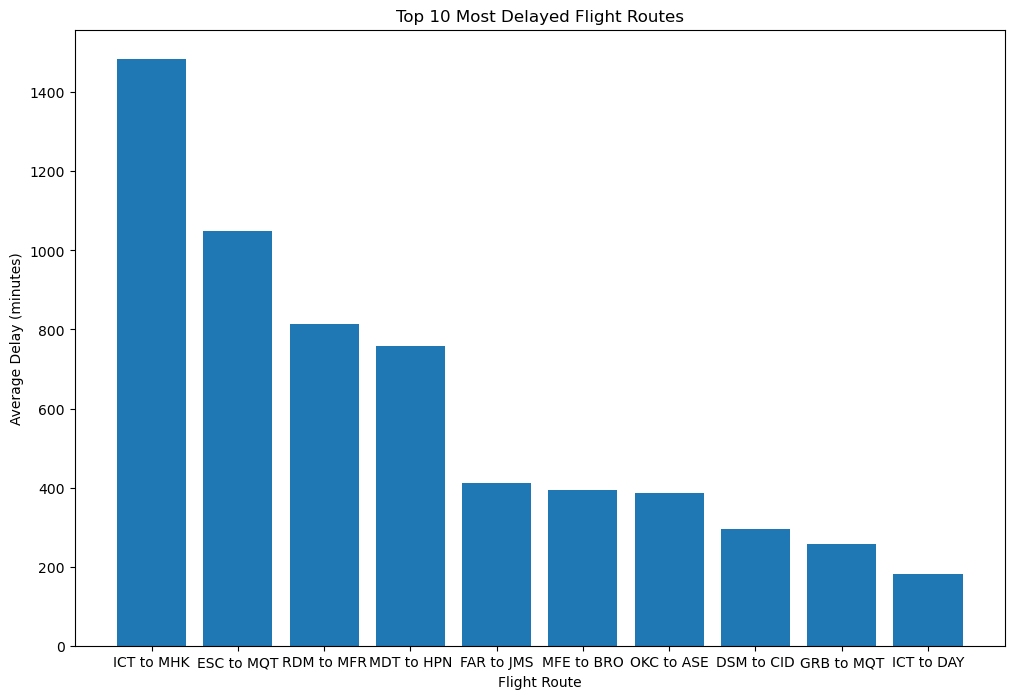

In [42]:
#determine average delay for each airport by averaging the departure delay for their flights
avg_delay_per_route = plane_df.groupby(['ORIGIN', 'DEST'])['DEP_DELAY'].mean().reset_index()

#get the airports with the top 10 longest average departure delay times
sorted_routes = avg_delay_per_route.sort_values(by='DEP_DELAY', ascending=False)
top_10_delayed_routes = sorted_routes.head(10)

# plot bar graph to show top 10 most delayed flight routes
plt.figure(figsize=(12, 8))
plt.bar(top_10_delayed_routes['ORIGIN'] + ' to ' + top_10_delayed_routes['DEST'], 
        top_10_delayed_routes['DEP_DELAY'])
plt.xlabel('Flight Route')
plt.ylabel('Average Delay (minutes)')
plt.title('Top 10 Most Delayed Flight Routes')
plt.show()

The graph above displays the top 10 most delayed flight routes (origin to destination airport). These routes should be avoided by customers due to risk of flight delay. A workaround would be to choose connecting flights to airports with low risk of delay/cancellation to get to the final destination. 